# HERE I WILL TRY TO SHOW THE DIFFERENCE BURNT AREA BY SUBSTRACTING THE GREEN IN PIXELS FROM 2011 TO 2012

In [1]:
# %matplotlib inline

# import cv2
# import numpy as np
# from scipy import misc
# import matplotlib.pyplot as plt
# import statistics

# from skimage import data 
# #photo_2010 = misc.imread('CSFireCrop2010.jpg')
# photo_2011 = misc.imread('CSFireCrop2011.jpg')
# photo_2012 = misc.imread('CSFireCrop2012.jpg')
# photo_2013 = misc.imread('CSFireCrop2013.jpg')

Above, I loaded two satellite images from the Clay Springs Wildfire site on the same scale . The images are from December 2010, 2011, 2012, and 2013, respectively.

In [2]:
# plt.figure(figsize=(15,15))
# plt.subplot(1,3,1);
# plt.imshow(photo_2011);
# plt.subplot(1,3,2);
# plt.imshow(photo_2012);
# plt.subplot(1,3,3);
# plt.imshow(photo_2013);

In [3]:
# print(photo_2011.shape)
# print(photo_2012.shape)
# print(photo_2013.shape)

# #Just verifying they're all the exact same size

### Green Intensity Only
Show the intensity of green in every pixel. It will show every row, every column, but then only the G value.
    
0 - red 

1 - green

2 - blue 

In [4]:
# green_2011 = photo_2011
# green_2011[:,:,0] = 0
# green_2011[:,:,2] = 0

# green_2012 = photo_2012
# green_2012[:,:,0] = 0
# green_2012[:,:,2] = 0

# green_2013 = photo_2013
# green_2013[:,:,0] = 0
# green_2013[:,:,2] = 0

### Type Cast Arrays

To avoid overflow.

In [5]:
# green_2010.astype(np.int16)
# green_2011.astype(np.int16)
# green_2012.astype(np.int16)
# green_2013.astype(np.int16)

In [6]:
# diff_11_10 = (green_2011.astype(np.int16)- green_2010.astype(np.int16))
# diff_12_11 = (green_2012.astype(np.int16)- green_2011.astype(np.int16))
# diff_13_12 = (green_2013.astype(np.int16)- green_2012.astype(np.int16))

# #Low Intensity Filters...
# filter_11_10 = diff_11_10 < 0
# filter_12_11 = diff_12_11 < 0
# filter_13_12 = diff_13_12 < 0

# diff_11_10[filter_11_10] = 0
# diff_12_11[filter_12_11] = 0
# diff_13_12[filter_13_12] = 0

In [7]:
# plt.figure(figsize=(15,15))
# plt.subplot(1,3,1)
# plt.imshow(diff_11_10)
# plt.subplot(1,3,2)
# plt.imshow(diff_12_11)
# plt.subplot(1,3,3)
# plt.imshow(diff_13_12)

### Almost done!

Awesome. Now, the only problem is that we cannot compare the images visualy since, they are not scaled to the smae maximum intensities (255, ideally). Let's try OpenCV immage subtraction. 

In [68]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

image10 = cv2.imread('CSFireCrop2010.jpg')
image11 = cv2.imread('CSFireCrop2011.jpg')
image12 = cv2.imread('CSFireCrop2012.jpg')
image13 = cv2.imread('CSFireCrop2013.jpg')

In [69]:
# Make a filter for a range of green

hsv10 = cv2.cvtColor(image10, cv2.COLOR_BGR2HSV)
hsv11 = cv2.cvtColor(image11, cv2.COLOR_BGR2HSV)
hsv12 = cv2.cvtColor(image12, cv2.COLOR_BGR2HSV)
hsv13 = cv2.cvtColor(image12, cv2.COLOR_BGR2HSV)

lower_green = np.array([60,64,0])
upper_green = np.array([99,255,102])

mask10 = cv2.inRange(hsv10, lower_green, upper_green)
res10 = cv2.bitwise_and(image10, image10, mask = mask10)

mask11 = cv2.inRange(hsv11, lower_green, upper_green)
res11 = cv2.bitwise_and(image11, image11, mask = mask11)

mask12 = cv2.inRange(hsv12, lower_green, upper_green)
res12 = cv2.bitwise_and(image12, image12, mask = mask12)

mask13 = cv2.inRange(hsv13, lower_green, upper_green)
res13 = cv2.bitwise_and(image13, image13, mask = mask13)


plt.imsave('res10.jpg', res10)
# cv2.imshow('image11', image11)
# cv2.imshow('mask11', mask11)
plt.imsave('res11.jpg', res11)

# cv2.imshow('image12', image12)
# cv2.imshow('mask12', mask12)
plt.imsave('res12.jpg', res12)

# cv2.imshow('image13', image13)
# cv2.imshow('mask13', mask13)
plt.imsave('res13.jpg', res13)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

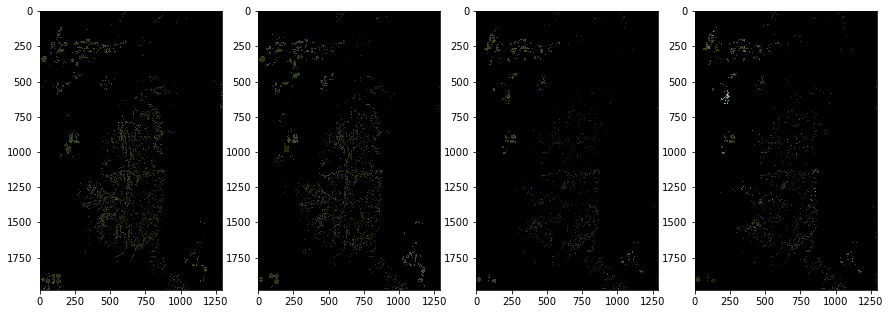

In [70]:
# SO AWESOME!

res10 = misc.imread('res10.jpg')

plt.figure(figsize=(15,15))
plt.subplot(1,4,1);
plt.imshow(res10);
plt.subplot(1,4,2);
plt.imshow(res11);
plt.subplot(1,4,3);
plt.imshow(res12);
plt.subplot(1,4,4);
plt.imshow(res13);

## Let's make them prettier

In [74]:
f10 = res10[:,:,:] < 1
f11 = res11[:,:,:] < 1 
f12 = res12[:,:,:] < 1 
f13 = res13[:,:,:] < 1 

print(f10.shape)

(1979, 1292, 4)


In [75]:
white10 = res10
white10[f10] = 255

white11 = res11
white11[f11] = 255

white12 = res12
white12[f12] = 255

white13 = res13
white13[f13] = 255

print(white10.shape)

(1979, 1292, 4)


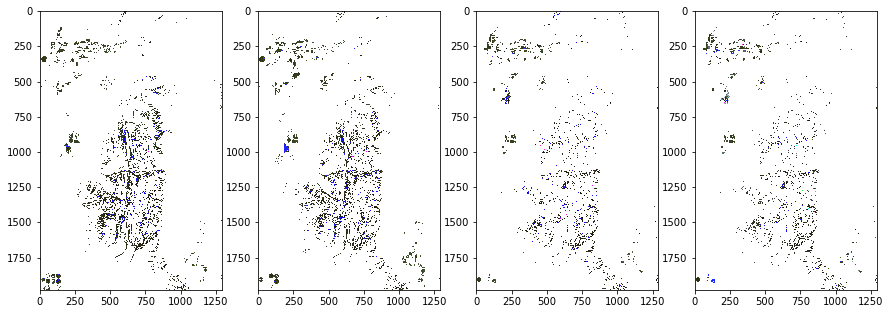

In [76]:
plt.figure(figsize=(15,15))
plt.subplot(1,4,1);
plt.imshow(white10)
plt.subplot(1,4,2);
plt.imshow(white11)
plt.subplot(1,4,3);
plt.imshow(white12)
plt.subplot(1,4,4);
plt.imshow(white13)

In [ ]:
## Beautiful :)
Now save them.

In [78]:
plt.imsave('white10.jpg', white10)
plt.imsave('white11.jpg', white11)
plt.imsave('white12.jpg', white12)
plt.imsave('white13.jpg', white13)

(1979, 1292, 3)
151951.0


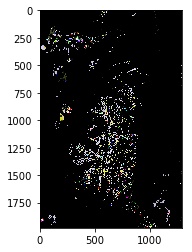

In [133]:
## Now what is the difference between vegetation in 2012 and in 2011?

difference = np.subtract(white12, white11)
plt.imsave('diff.jpg', difference)

plt.imshow(difference)
print(difference.shape)
print(np.count_nonzero(difference)/3)

# 2,556,868 px are 450 sq miles
# Then 155,535 non-zero pixels mean 27.374 sq miles of vegetation = 17519.36 acres
# 25 tons of fuel / acre of vegetation = 437,984 tons of fuel in Clay Springs
# 1,640 kg (a.k.a 1.8 ton) CO2/ton of wood fuel ->788,371 ton co2-equivalents

# 715k tons of co2 = 80 million gallons of gas, 1 year of elec used by 67,500 Utah households, volume of 143,000 air balloons

In [125]:
np.set_printoptions(threshold=10000)
print(gray)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
